<a href="https://colab.research.google.com/github/KhanhPhantxwes/T-Mobile_Churn_Analysis_Demo/blob/main/Visulisation_TelecomChurn_Seaborn_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tmobile_magenta = "#E20074"

In [32]:
df = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
print(df.shape)

(7043, 21)


In [34]:
#Evaluate data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## **Average MonthlyCharges over tenure**

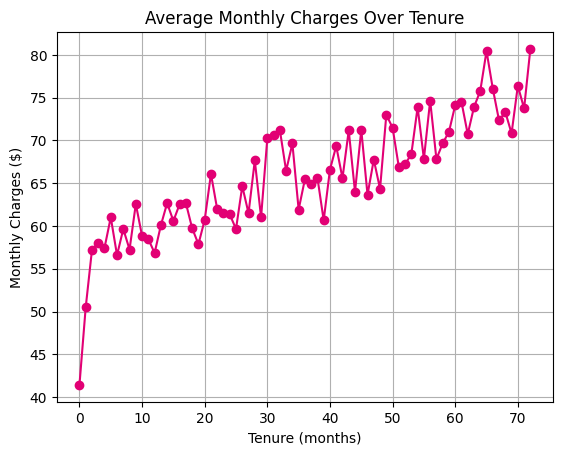

In [35]:
# Average MonthlyCharges over tenure
avg_charges = df.groupby('tenure')['MonthlyCharges'].mean()

plt.plot(avg_charges.index, avg_charges.values, color= "#E20074", marker='o')
plt.title("Average Monthly Charges Over Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges ($)")
plt.grid(True)
plt.show()

## **Distribution of TotalCharges**

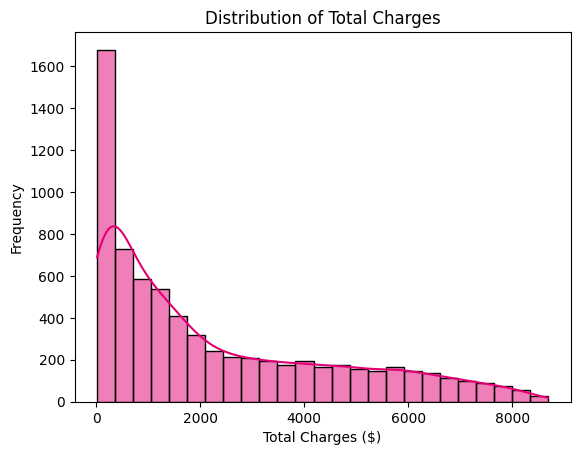

In [36]:
# Convert TotalCharges to numeric (handle missing values if needed)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
sns.histplot(df['TotalCharges'], kde=True,color="#E20074")
plt.title("Distribution of Total Charges")
plt.xlabel("Total Charges ($)")
plt.ylabel("Frequency")
plt.show()

## **Distribution of customers by InternetService type**

/tmp/ipython-input-37-4201224019.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='InternetService', data=df, palette='coolwarm')


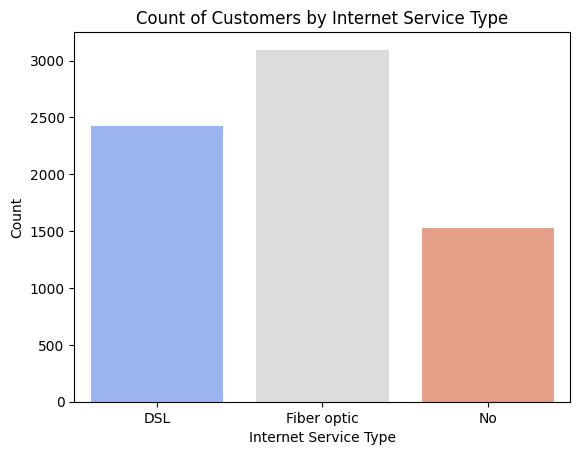

In [37]:
sns.countplot(x='InternetService', data=df, palette='coolwarm')
plt.title("Count of Customers by Internet Service Type")
plt.xlabel("Internet Service Type")
plt.ylabel("Count")
plt.show()

## **Monthly Charges grouped by Payment Method**

/tmp/ipython-input-38-609128967.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='Set2')


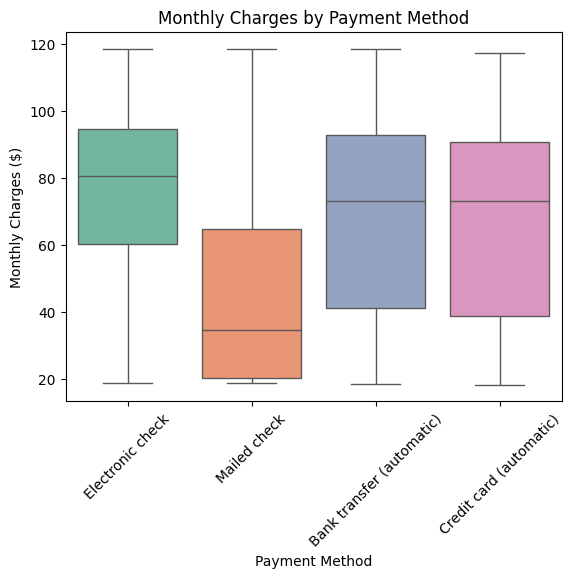

In [38]:
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='Set2')
plt.title("Monthly Charges by Payment Method")
plt.xticks(rotation=45)
plt.xlabel("Payment Method")
plt.ylabel("Monthly Charges ($)")
plt.show()

## **Tenure vs. Monthly Charges, color-coded by Churn**

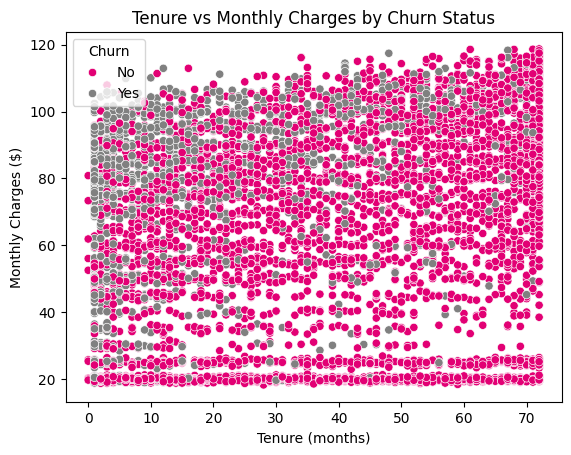

In [39]:
# Define T-Mobile magenta
tmobile_magenta = "#E20074"

# Define custom palette
custom_palette = {
    'No': tmobile_magenta,   # Not churned
    'Yes': 'gray'            # Churned
}

# Plot
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette=custom_palette)
plt.title("Tenure vs Monthly Charges by Churn Status")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges ($)")
plt.show()

## **Correlation Matrix**

In [40]:

# Ensure numeric data is ready for analysis
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [41]:
# Calculate the correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr() # This selects only the numeric columns from the DataFrame df.

# Display the correlation matrix
print(correlation_matrix)


                SeniorCitizen    tenure  MonthlyCharges  TotalCharges
SeniorCitizen        1.000000  0.016567        0.220173      0.102411
tenure               0.016567  1.000000        0.247900      0.825880
MonthlyCharges       0.220173  0.247900        1.000000      0.651065
TotalCharges         0.102411  0.825880        0.651065      1.000000


# **Positive Correlation: When one variable increases, the other tends to increase as well. For example, as tenure increases, TotalCharges may also increase.**

In [42]:
# Filter correlations above 0.5 or below -0.5
#Positive Correlation: When one variable increases, the other tends to increase as well.
#For example, as tenure increases, TotalCharges may also increase.
significant_correlations = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
print(significant_correlations)


                SeniorCitizen   tenure  MonthlyCharges  TotalCharges
SeniorCitizen             1.0      NaN             NaN           NaN
tenure                    NaN  1.00000             NaN      0.825880
MonthlyCharges            NaN      NaN        1.000000      0.651065
TotalCharges              NaN  0.82588        0.651065      1.000000


## **Visualize Correlations**

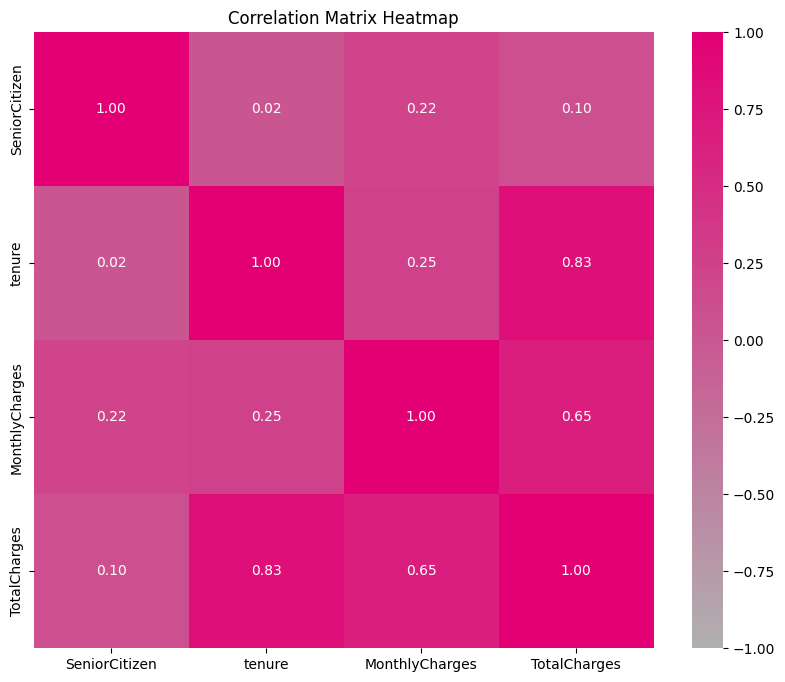

In [48]:
# Create a heatmap
plt.figure(figsize=(10, 8))
# Define T-Mobile magenta and gray
tmobile_magenta = "#E20074"
gray = "#B0B0B0"
from matplotlib.colors import LinearSegmentedColormap
# Create custom colormap from gray to magenta
custom_cmap = LinearSegmentedColormap.from_list("tmobile_gray", [gray, tmobile_magenta])


sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()


# **Scatter Plots for Specific Variable Pairs**

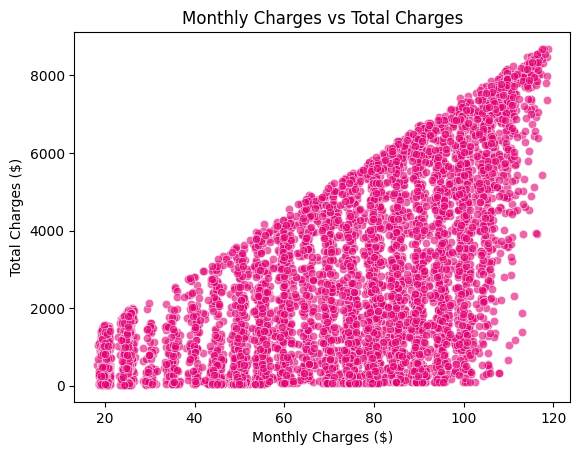

In [47]:
# Scatter plot for MonthlyCharges vs TotalCharges
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, alpha=0.6,color = "#E20074")
plt.title("Monthly Charges vs Total Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Total Charges ($)")
plt.show()

**Customers who’ve been with the company for a long time might have stronger loyalty or fewer reasons to leave. To investigate, we need to encode the Churn column into numeric values (1 for "Yes" and 0 for "No"). This lets us calculate the correlation between tenure and churn likelihood.**

In [45]:
df['Churn_Encoded'] = df['Churn'].map({'Yes': 1, 'No': 0})
correlation_tenure_churn = df['tenure'].corr(df['Churn_Encoded'])
print(f"Correlation between Tenure and Churn: {correlation_tenure_churn:.2f}")

Correlation between Tenure and Churn: -0.35


You’ll notice that as tenure increases, the churn likelihood tends to decrease, reinforcing the idea that long-tenured customers are less likely to leave.

# **Are payment methods linked to differences in MonthlyCharges?**

/tmp/ipython-input-46-2423063758.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='pastel')


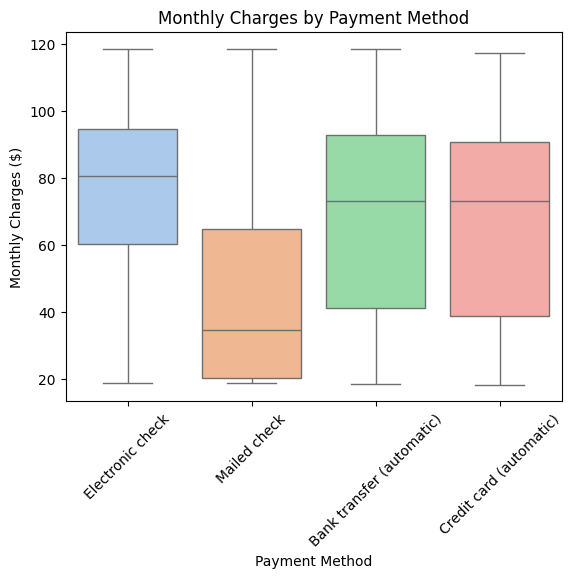

In [46]:
sns.boxplot(x='PaymentMethod', y='MonthlyCharges', data=df, palette='pastel')
plt.title("Monthly Charges by Payment Method")
plt.xlabel("Payment Method")
plt.ylabel("Monthly Charges ($)")
plt.xticks(rotation=45)
plt.show()

This plot reveals not only the median charges for each payment method but also the variability within each group. For instance, customers using automatic payments might have higher charges, suggesting they prefer premium services.